In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

 # xopt CNSGA function example
 
 See the xopt_class example for the Xopt object method

In [2]:
from xopt.cnsga import cnsga
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
NAME = 'TNK'
BOUND_LOW, BOUND_UP = [0.0, 0.0], [3.14159, 3.14159]  


X_RANGE = [0, 1.4]
Y_RANGE = [0, 1.4]

# Pure number version
def TNK(individual):    
    x1=individual[0]
    x2=individual[1]
    objectives =  (x1, x2)
    constraints = (x1**2+x2**2-1.0 - 0.1*np.cos(16*np.arctan2(x1, x2)), (x1-0.5)**2+(x2-0.5)**2 )
    return objectives, constraints

# labeled version
def evaluate_TNK(inputs):
    
    info = {'some':'info', 'about':['the', 'run']}
    ind = [inputs['x1'], inputs['x2']]
    objectives, constraints = TNK(ind)    
    outputs = {'y1':objectives[0], 'y2':objectives[1], 'c1':constraints[0], 'c2':constraints[1]}
    
    return outputs

VOCS = {
    'name':'TNK_test',
    
    'variables': {
        'x1':[0, 3.14159],
        'x2':[0, 3.14159]
    },
    'objectives':{
        'y1':'MINIMIZE',
        'y2':'MINIMIZE'
        
    },
    'constraints':{
        'c1': ['GREATER_THAN', 0],
        'c2': ['LESS_THAN', 0.5]
        
    },
    'constants':{'a':'dummy_constant'},
    'linked_variables':{'x9':'x1'}
    
    
}
TNK([0,0])

((0, 0), (-1.1, 0.5))

In [4]:
# Pick a parallel method


#from concurrent.futures import ProcessPoolExecutor as PoolExecutor
from concurrent.futures import ThreadPoolExecutor as PoolExecutor
executor = PoolExecutor()

In [5]:
pop_data = cnsga(executor, vocs=VOCS, evaluate_f=evaluate_TNK,
            max_generations = 20, population_size=64, output_path=None,
            verbose=True) 




 ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
  ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
░ ░               ░       ░        ░       ░  ░
░                                              


Continuous Non-dominated Sorting Genetic Algorithm
Version 0.4.3+104.g5c5c916.dirty

Creating toolbox from vocs.
Created toolbox with 2 variables, 2 constraints, and 2 objectives.
    Using selection algorithm: nsga2
vocs:
{'constants': {'a': 'dummy_constant'},
 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]},
 'linked_variables': {'x9': 'x1'},
 'name': 'TNK_test',
 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'},
 'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]}}
Initializing with

In [6]:
pop_data2 = cnsga(executor, vocs=VOCS, population=pop_data, evaluate_f=evaluate_TNK,
            max_generations = 40, population_size=64, output_path=None,
            verbose=True) 




 ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
  ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
░ ░               ░       ░        ░       ░  ░
░                                              


Continuous Non-dominated Sorting Genetic Algorithm
Version 0.4.3+104.g5c5c916.dirty

Creating toolbox from vocs.
Warning in cnsga_toolbox: Redefining creator.Individual
Created toolbox with 2 variables, 2 constraints, and 2 objectives.
    Using selection algorithm: nsga2
vocs:
{'constants': {'a': 'dummy_constant'},
 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]},
 'linked_variables': {'x9': 'x1'},
 'name': 'TNK_test',
 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'},
 'variables': {'x

In [7]:
pop_data2.keys()

dict_keys(['variables', 'generation', 'vocs', 'error', 'inputs', 'outputs'])

# Plot 

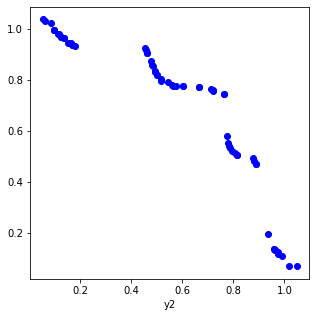

In [8]:
# Extract objectives from output
key1, key2 = list(VOCS['objectives'])

x = [o[key1] for o in pop_data2['outputs']]
y = [o[key2] for o in pop_data2['outputs']]

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(x, y, color='blue')
#ax.set_xlim(X_RANGE)
#ax.set_ylim(Y_RANGE)
ax.set_xlabel(key1)
ax.set_xlabel(key2)
ax.set_aspect('auto')
#ax.set_title(NAME)